## Libraries Loading

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import math

## Data Preparing

In [23]:
# Loading Data
path = "../data/raw/Covid_19 Dataset.csv"
df = pd.read_csv(path)

In [24]:
df.drop(["Unnamed: 0", "time"], axis=1, inplace=True)

In [25]:
# Drop null values
cols = ['continent']
df = df.dropna(subset=cols)

In [26]:
# Replace numerical null values with mean
for col in df.select_dtypes(include='number'):
    df[col] = df[col].fillna(df[col].mean())

In [27]:
# Convert day in to datetime datatype
df['day'] = pd.to_datetime(df['day'], format='%Y-%m-%d', errors='coerce')

In [28]:
# Convert total_cases in to float64 datatype
df['total_cases'] = df['total_cases'].astype('float64')

In [29]:
# Export the processed dataset
df.to_csv('../data/processed/Covid_Processed.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 0 to 230
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   country          229 non-null    object        
 1   continent        229 non-null    object        
 2   population       229 non-null    float64       
 3   day              229 non-null    datetime64[ns]
 4   active_cases     229 non-null    float64       
 5   critical_cases   229 non-null    float64       
 6   total_cases      229 non-null    float64       
 7   recovered_cases  229 non-null    float64       
 8   1M_pop_cases     229 non-null    float64       
 9   1M_pop_deaths    229 non-null    float64       
 10  total_deaths     229 non-null    float64       
 11  1M_pop_tests     229 non-null    float64       
 12  total_tests      229 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 25.0+ KB


## Exploratory Data Analysis

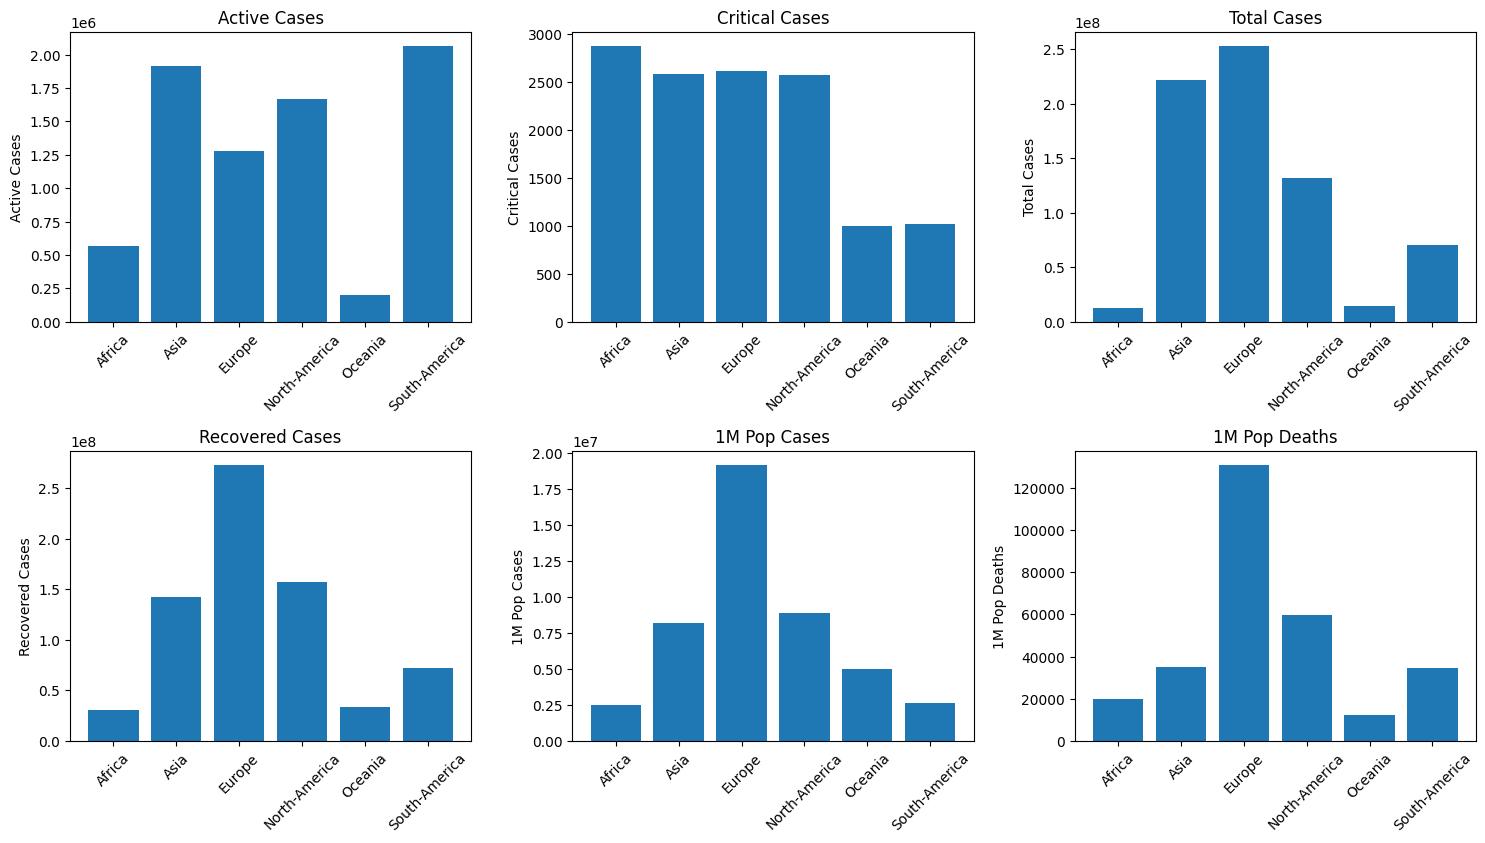

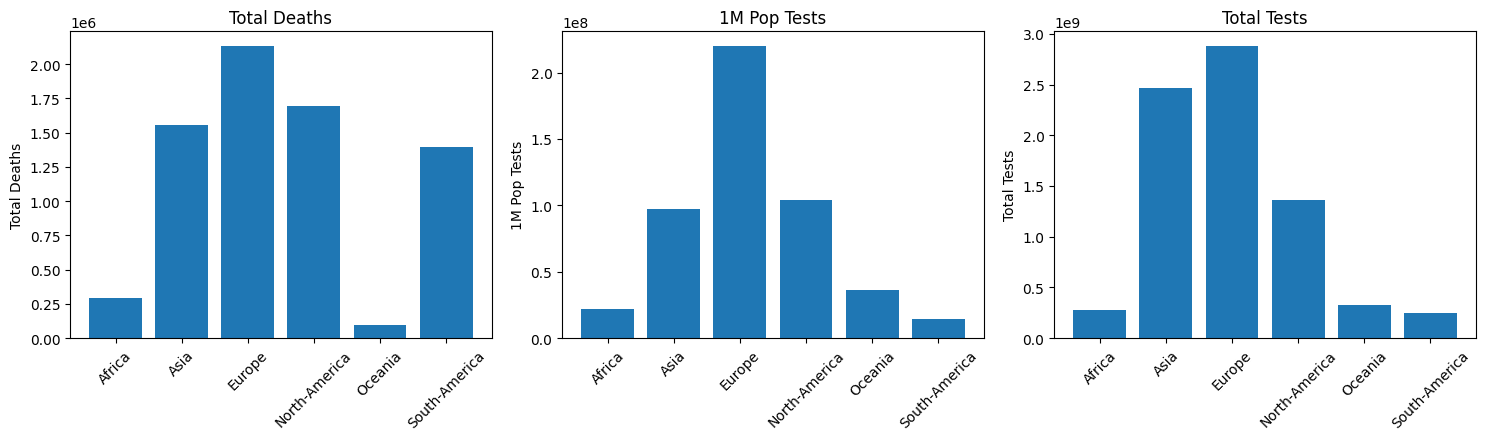

In [41]:
cols = [
    "active_cases", "critical_cases", "total_cases", "recovered_cases",
    "1M_pop_cases", "1M_pop_deaths", "total_deaths", "1M_pop_tests", "total_tests"
]

# Split into two figures
fig_splits = [cols[:6], cols[6:]]  # first 5, then remaining 4

for fig_cols in fig_splits:
    n = len(fig_cols)
    ncols = 3
    nrows = 4

    fig, axes = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(15, 4 * nrows),
    )

    # Flatten axes for easy indexing
    axes = axes.flatten()

    for ax, col in zip(axes, fig_cols):
        agg = df.groupby("continent")[col].sum()

        ax.bar(agg.index, agg.values)
        ax.set_title(col.replace("_", " ").title())
        ax.set_ylabel(col.replace("_", " ").title())
        ax.tick_params(axis="x", rotation=45)

    # Remove unused subplots
    for ax in axes[n:]:
        ax.remove()

    # Set x-label only on bottom row
    for ax in axes[-ncols:]:
        ax.set_xlabel("Continent")
        ax.tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()